# 🚬 Smoking Status Prediction (КЕЙС №5) #
---
# 🧑‍🤝‍🧑 Команда проекта #
Участники:
- Фер Андрей - роль (MLE)
- Казанцев Дмитрий - роль (MLE)
- Стец Максим - роль (DA)
- Фабрикант Владислав - роль (DA)
- Михин Дмитрий - роль (DA)
- Александр Андреев - роль (SRE)
---
# 📖 Описание проекта #
Проект направлен на построение модели машинного обучения, которая по биосигналам и физиологическим показателям человека определяет, является ли он курильщиком или некурильщиком.
Модель обучается на медицинских данных (например, частота сердечных сокращений, уровень кислорода, холестерин, глюкоза и т. д.) и решает задачу бинарной классификации.

---
# 🎯 Цели проекта #
- Провести анализ биомедицинских данных (EDA)
- Подготовить и очистить данные для обучения
- Построить и сравнить несколько ML-моделей
- Выбрать наилучшую по метрикам качества
- Сохранить обученную модель для последующего использования (например, в Streamlit-приложении)
---
# 📦 Описание датасета #
Для проекта используется датасет соревнования:
Playground Series S3E24 — Smoking Status Prediction
Источник: Kaggle

Датасет содержит **159 256 наблюдений и 24 признака**, включая биометрические, физиологические и биохимические показатели здоровья человека.
Целевая переменная — smoking, принимает значения:
- 0 — человек не курит
- 1 — человек является курильщиком

## Группы признаков
## 🧍 Демографические
| Признак        | Описание         |
| -------------- | ---------------- |
| **age**        | возраст          |
| **height(cm)** | рост в см        |
| **weight(kg)** | вес в кг         |
| **waist(cm)**  | окружность талии |

## 👁👂 Физиологические
| Признак                  | Описание         |
| ------------------------ | ---------------- |
| **eyesight(left/right)** | острота зрения   |
| **hearing(left/right)**  | слух             |
| **systolic**             | верхнее давление |
| **relaxation**           | нижнее давление  |

## 🧬 Биохимические показатели крови
| Признак                 | Что означает                                          |
| ----------------------- | ----------------------------------------------------- |
| **Cholesterol**         | общий холестерин                                      |
| **HDL**                 | липопротеиды высокой плотности ("хороший холестерин") |
| **LDL**                 | липопротеиды низкой плотности ("плохой холестерин")   |
| **triglyceride**        | триглицериды                                          |
| **hemoglobin**          | гемоглобин                                            |
| **fasting blood sugar** | глюкоза натощак                                       |
| **serum creatinine**    | креатинин                                             |
| **Urine protein**       | белок в моче                                          |

## 🧪 Печёночные ферменты (важные для анализа курения!)
| Признак       | Расшифровка                                               |
| ------------- | --------------------------------------------------------- |
| **AST**       | Aspartate Aminotransferase — аспартатаминотрансфераза     |
| **ALT**       | Alanine Aminotransferase — аланинаминотрансфераза         |
| **Gtp (GGT)** | Gamma-Glutamyl Transferase — гамма-глутамилтранспептидаза |

## 🦷 Прочее
| Признак           | Значение      |
| ----------------- | ------------- |
| **dental caries** | кариес        |
| **id**            | идентификатор |
---
## 📄 Структура ноутбука

1. Загрузка и первичный анализ данных
2. Анализ данных (EDA)

## 1. Загрузка и первичный анализ данных

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
plt.style.use('seaborn-v0_8')
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../data/train.csv")

In [4]:
print("Shape:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

display(df.describe().T)

Shape: (159256, 24)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL       

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


## 🧩 Промежуточный итог: Общее представление о данных

**Размер датасета:** 159 256 строк × 24 признака
**Типы данных:** 19 `int64`, 5 `float64`
**Пропуски:** отсутствуют ✅

---

### ⚙️ Структура данных
- Демографические: `age`, `height(cm)`, `weight(kg)`, `waist(cm)`
- Физиологические: `systolic`, `relaxation`, `hearing`, `eyesight`
- Биохимические: `Cholesterol`, `LDL`, `HDL`, `triglyceride`, `AST`, `ALT`, `Gtp`
- Целевая переменная: **`smoking` (0 – не курит, 1 – курит)**

---

### 🚨 Потенциальные проблемы
- **Выбросы**: `LDL`, `triglyceride`, `ALT`, `AST`, `Gtp` имеют экстремальные значения (до 1000+)
- **Технические капы**: значения `9.9` в `eyesight` и `serum creatinine`
- **Классовый баланс:** 0 ≈ 56 %, 1 ≈ 44 % → допустимо, но требует стратификации
- **Многие признаки имеют разный масштаб (от бинарных до значений в тысячи), что важно учитывать перед обучением моделей — модели чувствительны к масштабированию.**
---

### 💡 Предварительные гипотезы
- Курильщики чаще имеют ↑ `Gtp`, `ALT`, `LDL`, `triglyceride` и ↓ `HDL`
- Возможна слабая зависимость от возраста и давления

---

## 2. Анализ данных (EDA)

,missing,missing_%


,count,pct
smoking,,
0,89603,56.26
1,69653,43.74


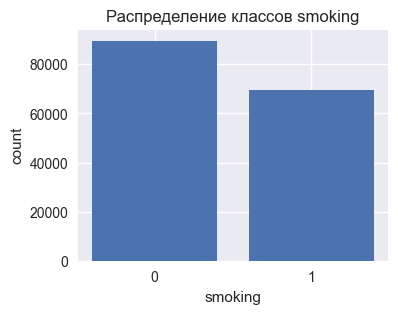

In [5]:
# Пропуски
na = df.isna().sum().sort_values(ascending=False)
display(pd.DataFrame({"missing": na, "missing_%": (na/len(df)*100).round(2)}).query("missing>0"))

# Дисбаланс классов
cls = df["smoking"].value_counts().sort_index()
display(pd.DataFrame({"count": cls, "pct": (cls/len(df)*100).round(2)}))
plt.figure(figsize=(4,3)); plt.bar(cls.index.astype(str), cls.values)
plt.title("Распределение классов smoking"); plt.xlabel("smoking"); plt.ylabel("count"); plt.show()

Мы считаем количество людей в каждом классе:

- 0 — не курит
- 1 — курит

Также строим график, чтобы визуально оценить баланс.

Это важно, потому что:

- сильный дисбаланс может привести к тому, что модели будут предсказывать только один класс;
- при необходимости можно применять стратификацию или методы балансировки (oversampling, undersampling).

👉 В нашем случае доли примерно 56% против 44% — это умеренный дисбаланс, который не критичен, но модель всё же лучше обучать со стратификацией.

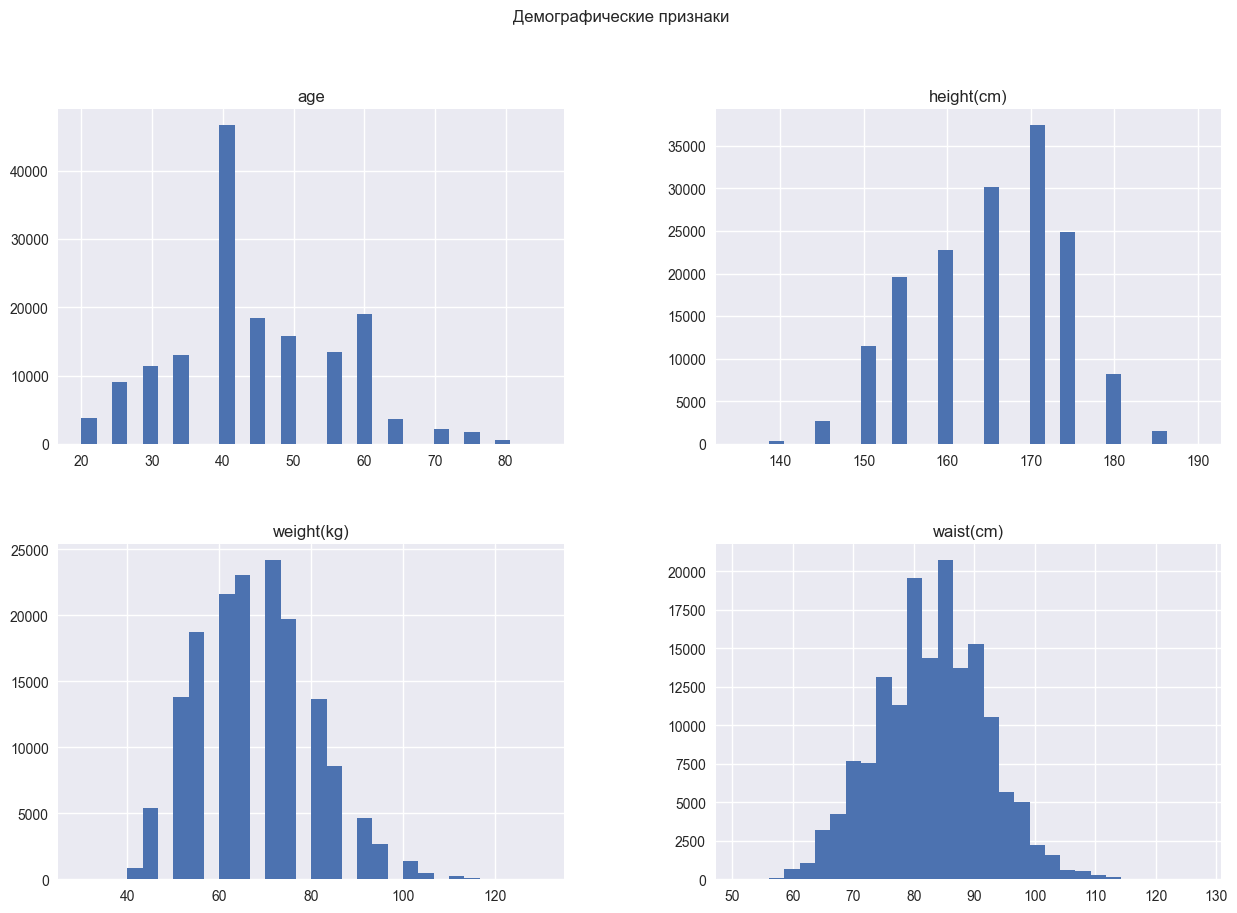

In [6]:
cols_demo = ["age", "height(cm)", "weight(kg)", "waist(cm)"]
df[cols_demo].hist(bins=30, figsize=(15,10))
plt.suptitle("Демографические признаки")
plt.show()

### ✅ Краткий вывод по демографическим признакам

1) Возраст (age)
- Распределение модально, с пиком примерно в районе 40–45 лет.
- Отчётливо видно, что большинство участников — люди среднего возраста.
- Мало наблюдений моложе 30 и старше 70 — распределение неравномерное.

📌 **Вывод:** датасет перекошен в сторону взрослых; это может влиять на закономерности курения, т.к. курение чаще среди людей 30–60 лет.

---
2) Рост (height)
- Распределение похоже на нормальное, пик около 165–170 см.
- Есть немного низких (<150) и высоких (>185), но без экстремальных выбросов.

📌 **Вывод:** рост распределён естественно, без аномалий. В целом — классическая колоколообразная форма.

---
3) Вес (weight)
- Тоже близко к нормальному распределению, но правый хвост более длинный.
- Пик примерно в районе 65–70 кг.
- Есть небольшое количество людей с весом >100 кг.

📌 **Вывод:** наблюдается лёгкий перекос вправо — из-за небольшой доли людей с избыточным весом.

---
4) Обхват талии (waist(cm))
- Явно сдвинут вправо.
- Основная масса значений 75–90 см.
- Хвост более тяжёлый (люди с талией 100–120 см).

📌 **Вывод:** наличие правого хвоста может указывать на людей с ожирением или метаболическими отклонениями — это потенциально важно, т.к. ожирение связано с курением и здоровьем в целом.

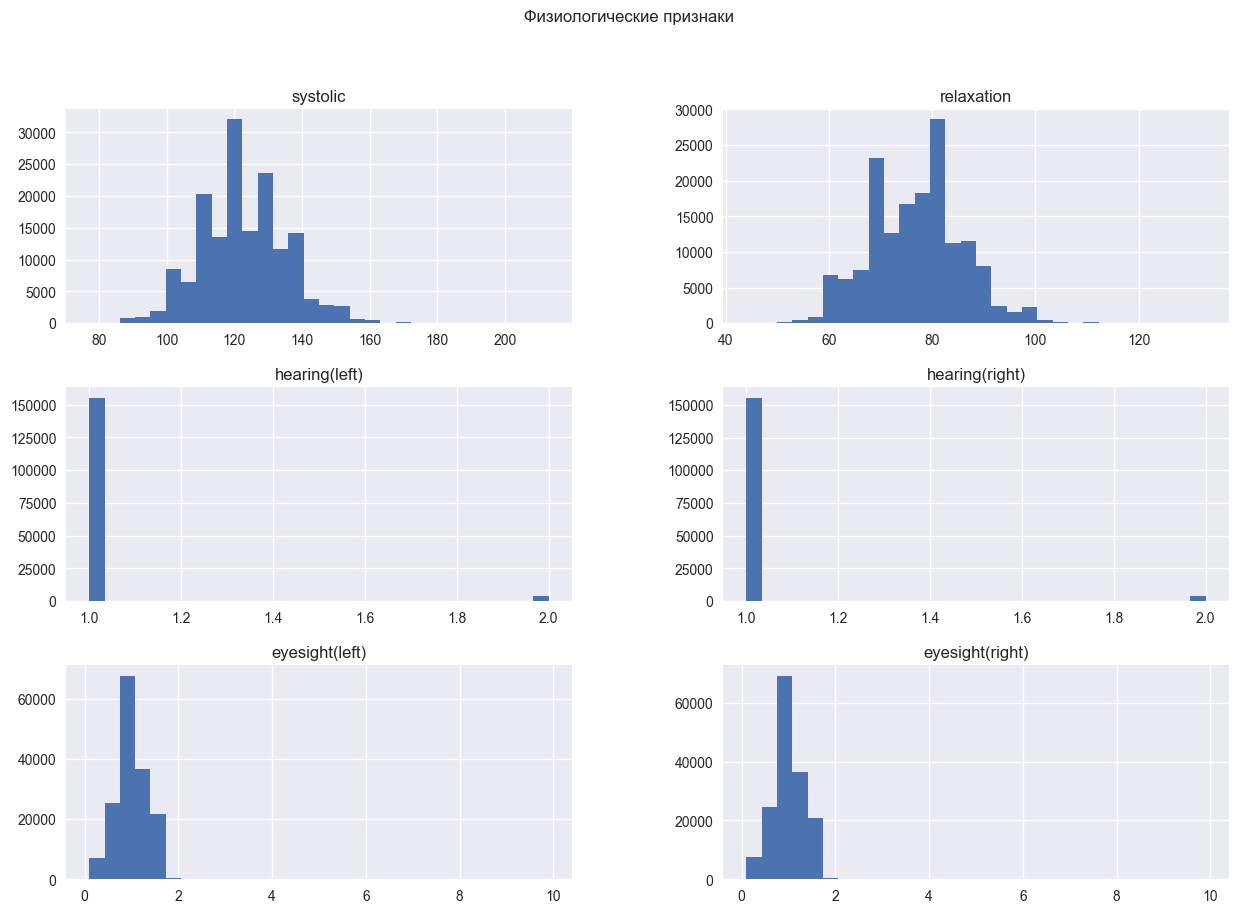

In [7]:
cols_phys = ["systolic", "relaxation", "hearing(left)", "hearing(right)",
             "eyesight(left)", "eyesight(right)"]
df[cols_phys].hist(bins=30, figsize=(15,10))
plt.suptitle("Физиологические признаки")
plt.show()

### 🧩 Краткий вывод по физиологическим признакам

1. Артериальное давление (systolic, relaxation)
- Оба признака распределены близко к нормальному, без резких выбросов
- Пик систолического давления — около 120 мм рт. ст., диастолического — 75–80 мм рт. ст.
- Видны «хвосты» вправо (повышенное давление у части людей), что типично для взрослой выборки.

👉 **Вывод:** давление может быть полезным признаком — оно косвенно связано со стрессом, образом жизни и вредными привычками.

---
2. Слух (hearing left/right)
- Почти все значения — 1, что означает "нормальный слух".
- Значений 2 крайне мало — фактически редкие отклонения.

👉 **Вывод:** признак почти константный, информативность для модели низкая.

---
3. Зрение (eyesight left/right)
- Основная масса — в диапазоне 0.8–1.2.
- Есть редкие большие значения (до 2.0), но их очень мало.
- Распределение слегка смещено влево (т.е. больше людей с небольшим снижением зрения).

👉 **Вывод:** признаки немного вариативные → могут давать слабый, но полезный сигнал. Курение снижает микроциркуляцию — связь возможна, но слабая.

---
### 🎯 Общий вывод по блоку физиологии
- Большинство физиологических признаков выглядят адекватно, без пропусков и аномалий.
- Слух почти не изменяется → вероятно, его можно исключить при моделировании.
- Давление и зрение в том виде, как есть, можно оставить — они умеренно вариативны.
- Значимых перекосов/ошибок нет — предобработка минимальна.

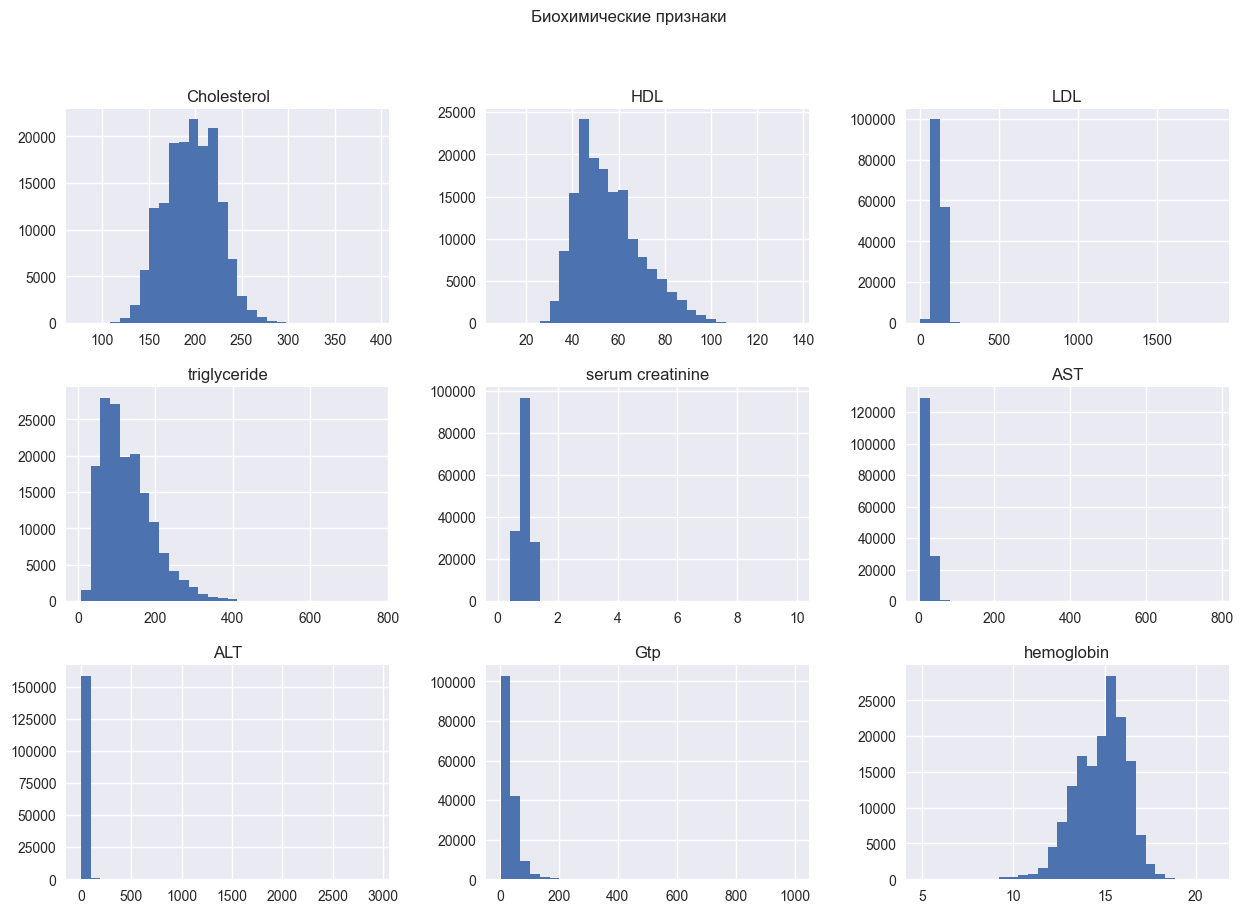

In [8]:
cols_bio = ["Cholesterol", "HDL", "LDL", "triglyceride",
            "serum creatinine", "AST", "ALT", "Gtp", "hemoglobin"]
df[cols_bio].hist(bins=30, figsize=(15,10))
plt.suptitle("Биохимические признаки")
plt.show()

### 🧪 Вывод по биохимическим признакам (Cholesterol, HDL, LDL, Triglyceride, AST, ALT, GTP, Hb, Creatinine)
1. Cholesterol (общий холестерин)
- Распределение близко к нормальному, основная масса значений — 150–250 мг/дл.
- Небольшой «тяжёлый хвост» вправо → возможны единичные пациенты с выраженной гиперхолестеринемией.

**Вывод:** признак информативный, выбросы умеренные.

---
2. HDL (липопротеины высокой плотности — “хороший” холестерин)
- Распределение смещено вправо, но выглядит адекватно для мед.данных.
- Значения в диапазоне 30–90 мг/дл, что совпадает с нормальными клиническими пределами.

**Вывод:** признак чистый, подойдет без трансформаций.

---
3. LDL (липопротеины низкой плотности — “плохой” холестерин)
- Очень сильный перекос вправо.
- Есть аномальные огромные значения до 1800+, которые невозможны в реальной медицине (обычно < 300).

**Вывод:** нужны:

✔ проверка выбросов,

✔ лог-трансформация или отсечение верхнего хвоста.

---
4. Triglyceride (триглицериды)
- Типичное логнормальное распределение (очень частый случай в медицине).
- Много высоких значений до 800+, что тоже похоже на реальные медицинские выбросы.

**Вывод:** лог-трансформация может улучшить распределение.

---
5. ALT (аланинаминотрансфераза)
- Оба признака имеют огромные пики около нижней границы и тяжёлый хвост вправо.
- Значения до 700–800, что слишком высоко — возможны ошибки ввода.
- Для нормальных людей ALT/AST ≈ 10–40.

**Вывод:** признаки критически перекошены →

✔ лог-преобразование,

✔ чистка выбросов по IQR/Z-score.

---
6. GTP (Gamma-GT — фермент печени)
- Аналогично AST/ALT — экстремальная асимметрия.
- Значения > 200 очень подозрительны.

**Вывод:** один из главных кандидатов на предобработку и очистку.

---
7. Hemoglobin (Hb — гемоглобин)
- Классическое нормальное распределение.
- Никаких выбросов.

**Вывод:** отличный, стабильный признак.

---
8. Serum Creatinine (креатинин)
- Перекос вправо.
- Много значений от 0.5 до 1.3 — нормально.
- Есть аномальные значения 5–10, что встречается редко и может испортить масштаб.

**Вывод:**

✔ ограничить верхние значения,

✔ рассмотреть лог-масштабирование.

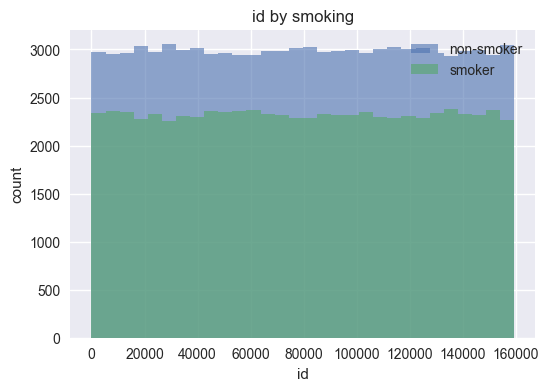

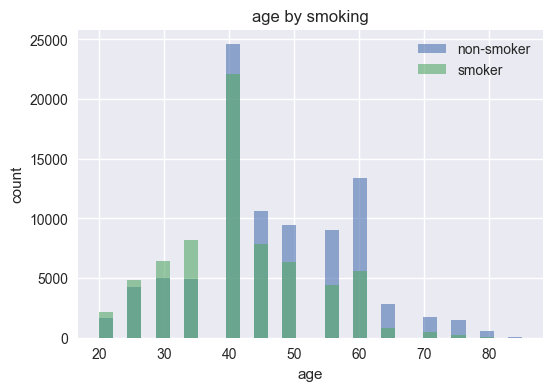

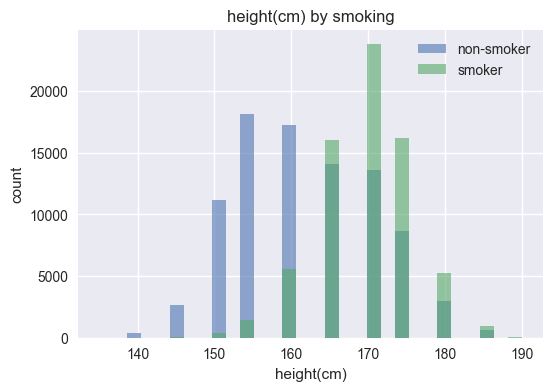

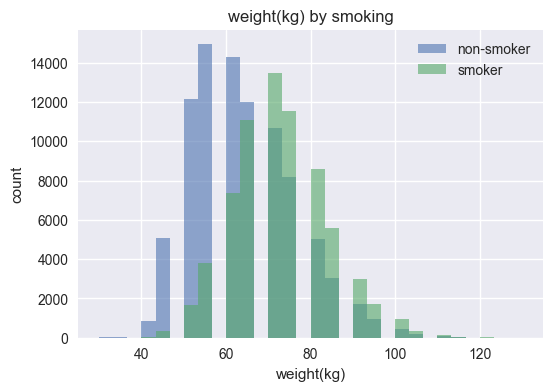

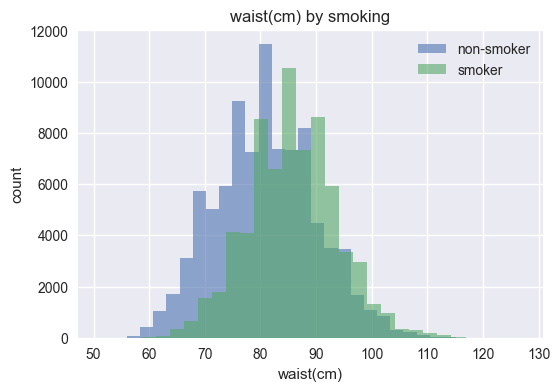

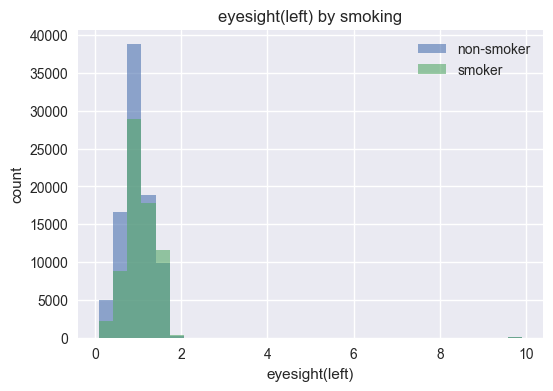

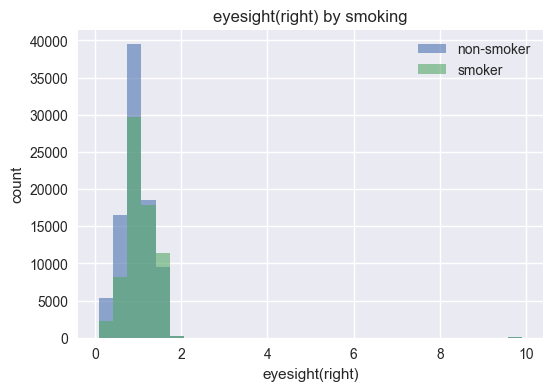

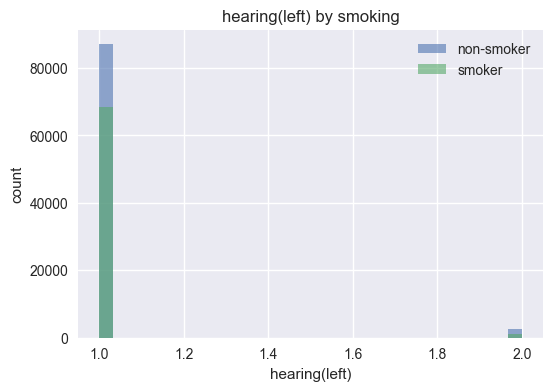

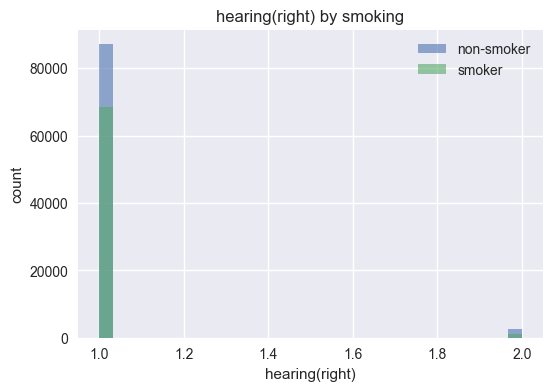

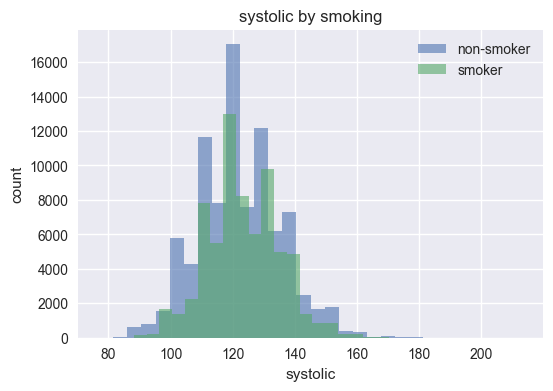

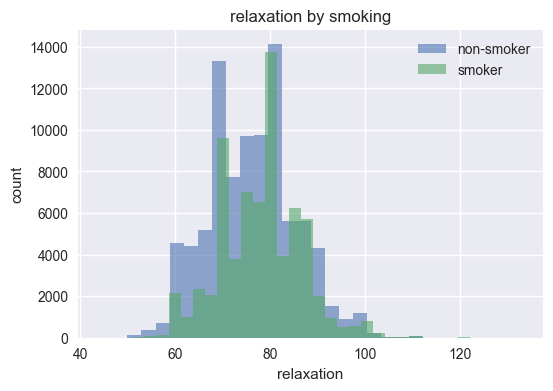

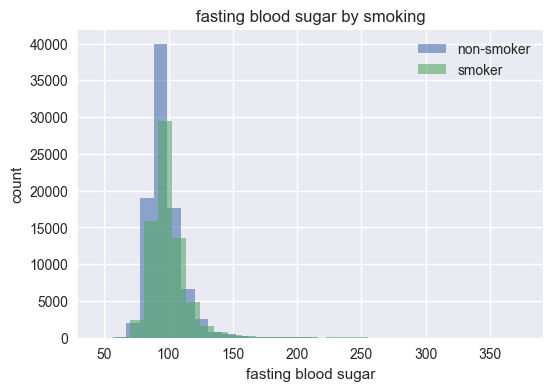

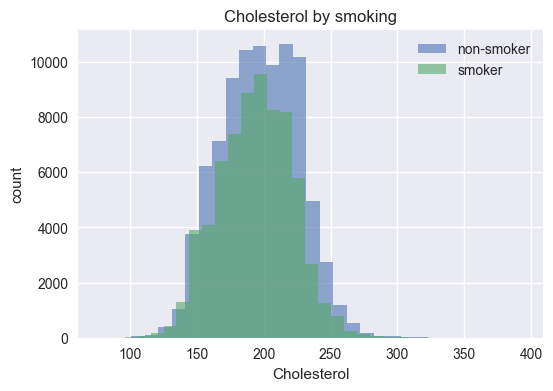

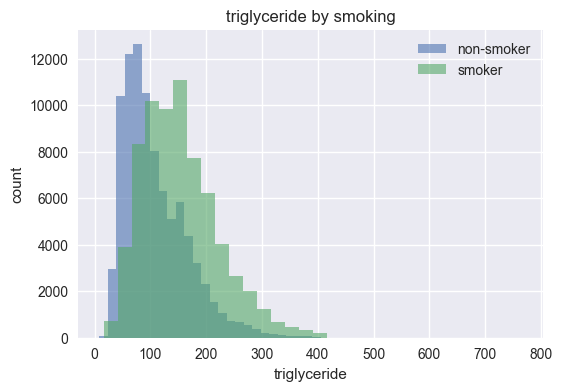

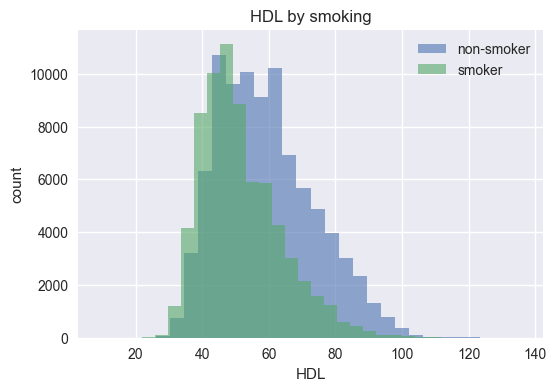

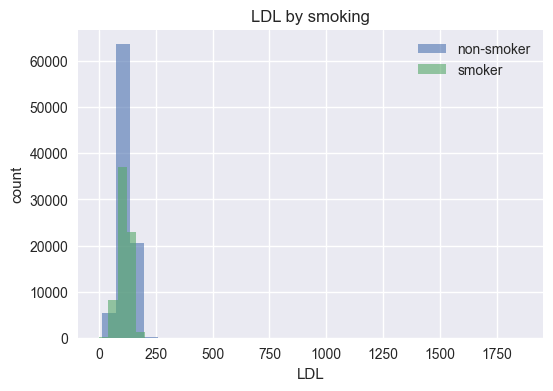

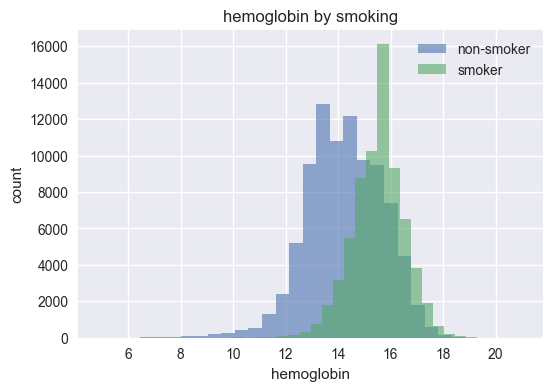

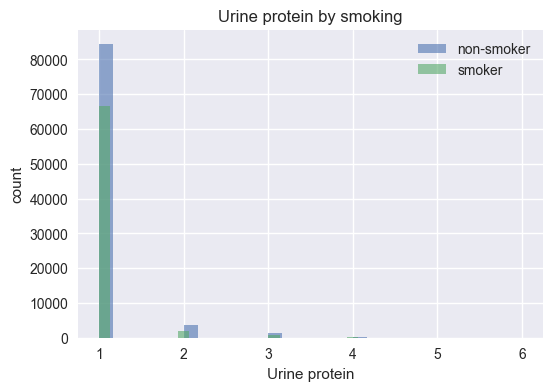

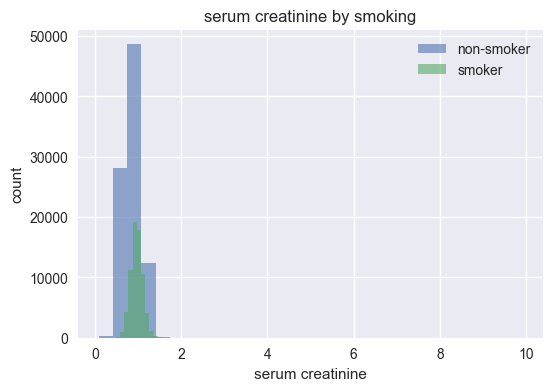

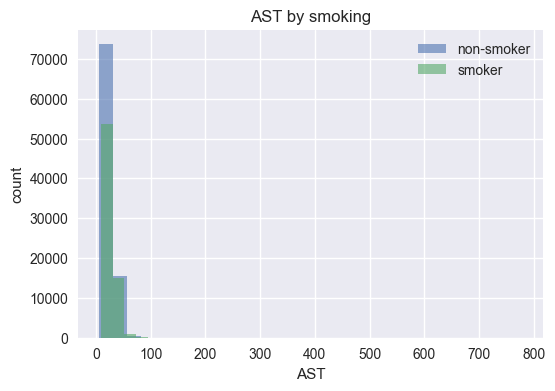

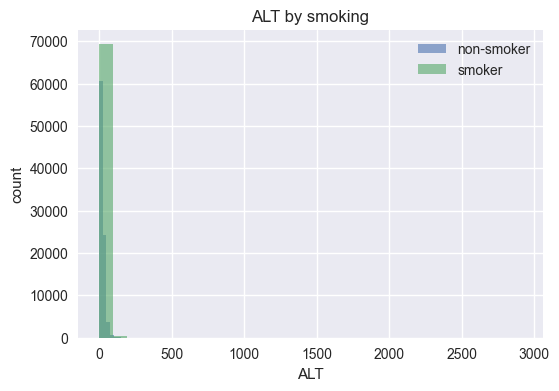

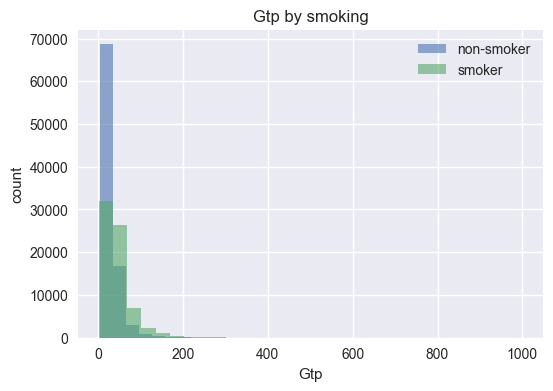

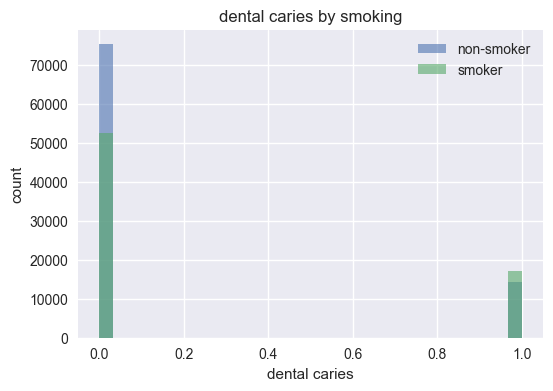

In [11]:
num_cols = df.select_dtypes(include=np.number).columns.drop("smoking")

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[df["smoking"]==0][col], bins=30, alpha=0.6, label="non-smoker")
    plt.hist(df[df["smoking"]==1][col], bins=30, alpha=0.6, label="smoker")
    plt.title(f"{col} by smoking")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.legend()
    plt.show()

### Наблюдения по гистограммам
- **Возраст, рост:** формы близки, заметных сдвигов нет.
- **Вес и талия:** у курильщиков распределения немного смещены вправо → чуть выше масса и окружность талии.
- **Давление (systolic/relaxation):** у курильщиков пик правее → в среднем выше давление.
- **Глюкоза натощак:** различия минимальны.
- **Липиды:**
  - **triglyceride** — у курильщиков явный правый сдвиг (больше высоких значений).
  - **LDL** — правый хвост длиннее у курильщиков (разница умеренная).
  - **HDL** — у курильщиков левый сдвиг (ниже HDL).
  - **Cholesterol** — лёгкий правый сдвиг.
- **Печёночные ферменты:** **Gtp**, **ALT**, **AST** выраженно скошены вправо, у курильщиков больше высоких значений.
- **Hemoglobin:** у курильщиков чуть выше.
- **Urine protein, hearing, eyesight:** различия небольшие; hearing = 1 доминирует, eyesight и creatinine имеют технический «потолок» **9.9**.

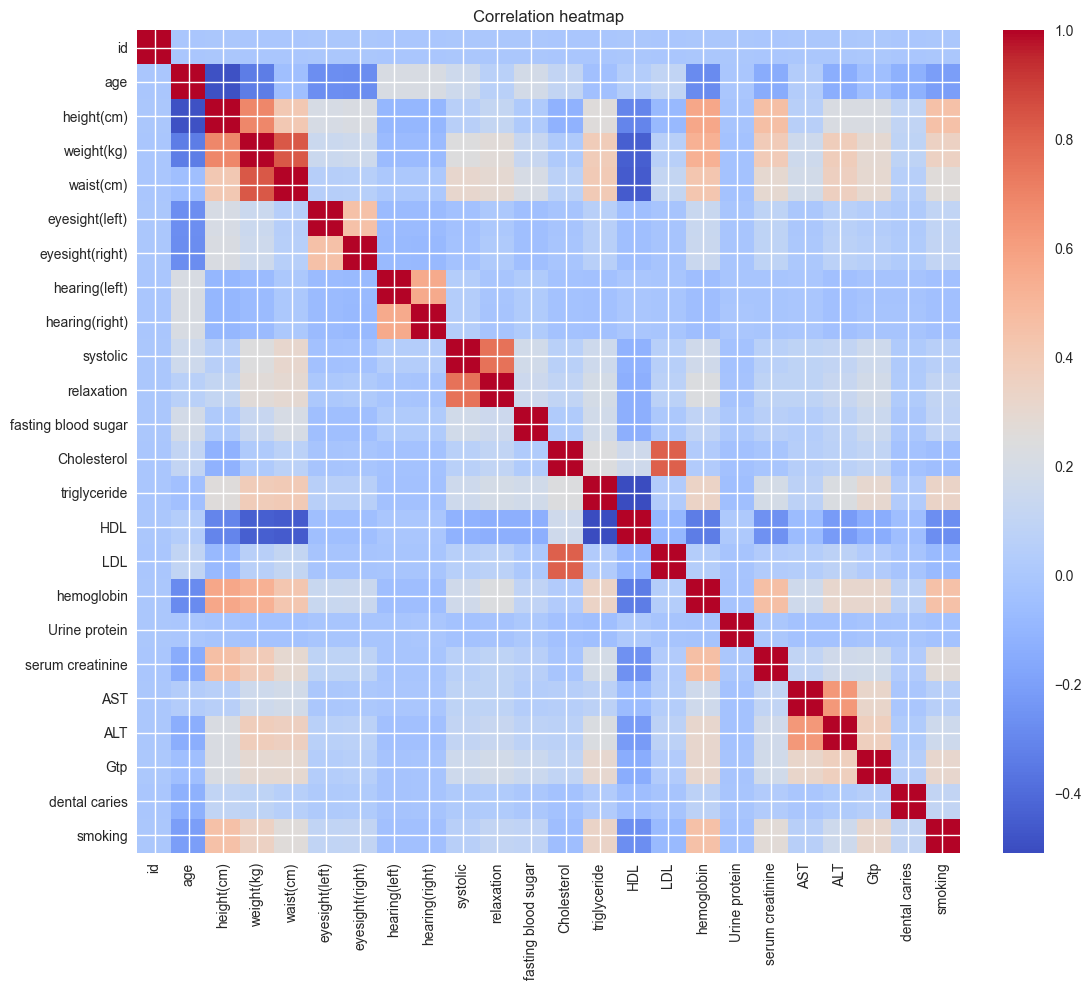

,corr_with_smoker
hemoglobin,0.450679
height(cm),0.447111
weight(kg),0.351748
triglyceride,0.331975
Gtp,0.305561
serum creatinine,0.272979
HDL,-0.271186
waist(cm),0.262715
age,-0.206033
ALT,0.163016


In [12]:
corr = df[num_cols.tolist()+["smoking"]].corr(numeric_only=True)

plt.figure(figsize=(12,10))
im = plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation heatmap"); plt.colorbar(im, fraction=0.046, pad=0.04); plt.tight_layout(); plt.show()

target_corr = corr["smoking"].drop("smoking").sort_values(key=lambda s: s.abs(), ascending=False)
display(target_corr.to_frame("corr_with_smoker").head(20))


### Топ-связи с `smoking` (по |corr|):
- **Положительные:** `hemoglobin (0.45)`, `height (0.45)`, `weight (0.35)`, `triglyceride (0.33)`, `Gtp (0.31)`, `serum creatinine (0.27)`, `waist (0.26)`, `ALT (0.16)`.
- **Отрицательные:** `HDL (-0.27)`, `age (-0.21)`, `LDL (-0.07)` (слабо).

### Интерпретация и важное замечание
- Сильные корреляции `hemoglobin` и `height` почти наверняка выступают **прокси пола** (в датасете нет колонки sex). Вероятно, в данных **мужчины чаще курят**, поэтому модели будут сильно опираться на эти признаки. Это повышает качество, но несёт риск **смещения/непереносимости**.
- Биохимические маркеры согласуются с ожиданиями: у курильщиков ↑ `Gtp`, `ALT`, `triglyceride` и ↓ `HDL`.

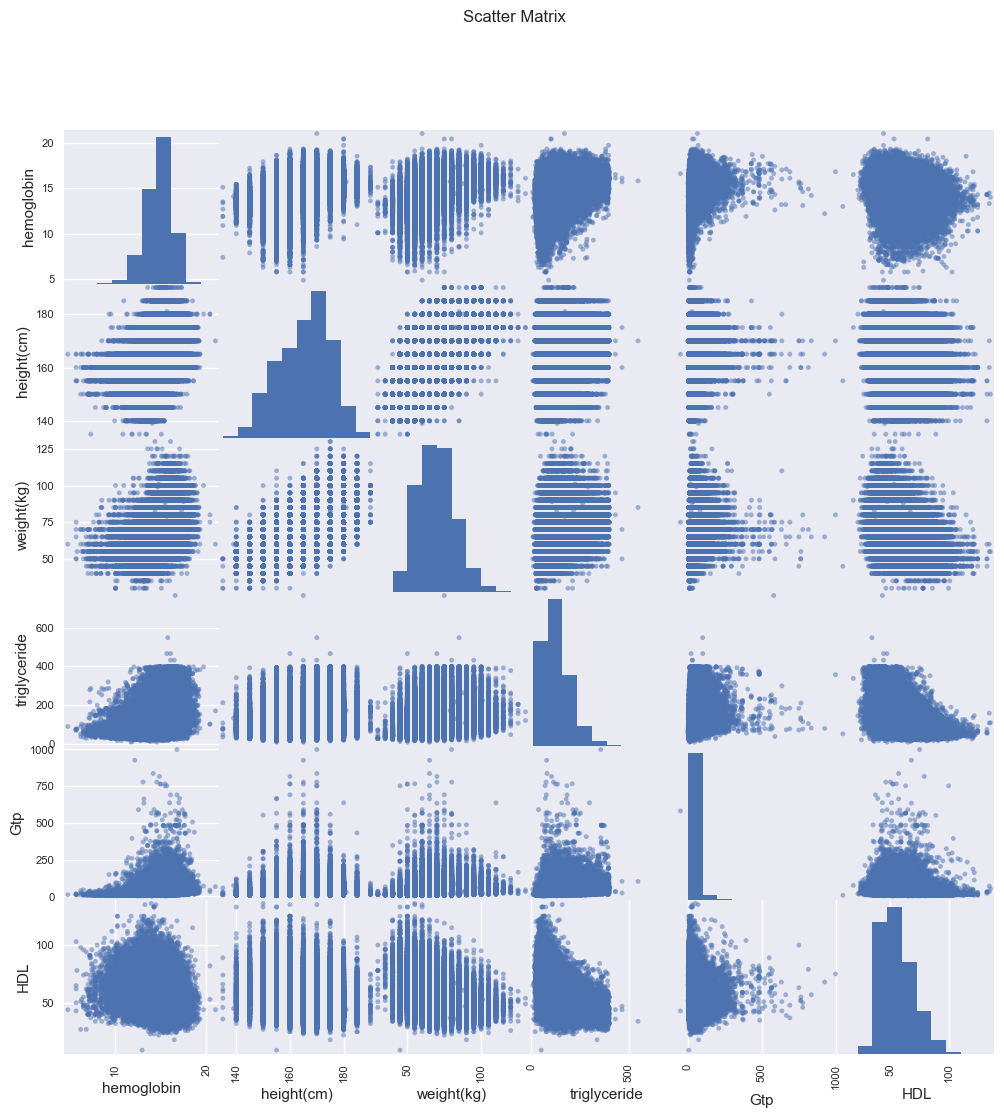

In [13]:
top = ['hemoglobin','height(cm)','weight(kg)','triglyceride','Gtp','HDL']
_ = scatter_matrix(df[top], figsize=(12,12), diagonal='hist')
plt.suptitle('Scatter Matrix'); plt.show()

### Наблюдения
- **Hemoglobin ↔ height/weight:** выраженная положительная зависимость (ожидаемо, отражает физические различия, вероятно, связанные с полом).
- **Triglyceride ↔ Gtp:** видна положительная зависимость, возможный общий фактор метаболического синдрома.
- **HDL** демонстрирует обратную зависимость к `triglyceride` и частично к `Gtp`.

### Выводы
- Scatter matrix подтверждает **корреляции из тепловой карты**.
- Есть выраженные **линейные кластеры**, особенно для антропометрических признаков.
- В данных заметны **плотные вертикальные полосы** — это результат **округления значений** в исходных измерениях (медицинские данные часто дискретизируются).
- Признаки выглядят разумно распределёнными, значимых выбросов не видно, кроме длинных хвостов у `triglyceride` и `Gtp`.

### Что дальше
→ Проверим количественно выбросы по IQR и Z-score, чтобы подтвердить хвостовые значения.
→ После этого сформируем **итог по выбросам и feature engineering** (BMI, WHtR, PulsePressure, лог-преобразования и т.д.).

In [14]:
out_iqr, out_z = defaultdict(dict), defaultdict(dict)
for c in num_cols:
    s = df[c].dropna()
    q1, q3 = s.quantile(0.25), s.quantile(0.75); iqr = q3-q1
    low, high = q1-1.5*iqr, q3+1.5*iqr
    out_iqr[c]["iqr_low"], out_iqr[c]["iqr_high"] = (s<low).sum(), (s>high).sum()
    m, sd = s.mean(), s.std(ddof=0)
    out_z[c]["z_abs>3"] = 0 if sd==0 else (((s-m).abs()/sd) > 3).sum()

out_tbl = (pd.DataFrame(out_iqr).T.rename(columns={"iqr_low":"iqr_low_outliers","iqr_high":"iqr_high_outliers"})
           .join(pd.DataFrame(out_z).T)).fillna(0).astype(int)
display(out_tbl.sort_values(["iqr_high_outliers","iqr_low_outliers","z_abs>3"], ascending=False).head(20))

,iqr_low_outliers,iqr_high_outliers,z_abs>3
dental caries,0,31532,0
Gtp,0,8792,2722
Urine protein,0,8394,2785
fasting blood sugar,346,7814,2159
ALT,0,6746,1689
AST,1,6336,1719
hearing(left),0,3818,3818
hearing(right),0,3730,3730
triglyceride,0,3087,1679
serum creatinine,2960,2983,281


## 🚨 Промежуточный итог: Выбросы (IQR & Z>3)

**Наиболее проблемные сверху (по IQR_high / Z>3):**
- `Gtp` **(8792 IQR_high, 2722 Z>3)** — длинный правый хвост.
- `ALT` **(6746 / 1689)**, `AST` **(6336 / 1719)** — сильная правоскошность.
- `triglyceride` **(3087 / 1679)** — выраженный хвост.
- `fasting blood sugar` **(7814 / 2159)** — заметные высокие значения.
- `serum creatinine` — **двусторонние** выбросы (2960 low, 2983 high) → подозрение на технический cap 9.9.
- `HDL`, `weight(kg)`, `waist(cm)`, `BP` — умеренные хвосты.

**Почему тут так много:**
- `dental caries` (0/1), `hearing(left/right)` (1/2), `Urine protein` (1..6) — **дискретные/категориально-ординальные** признаки. IQR у них «наказывает» крайние уровни, но это **не ошибка** данных.

**Выводы**
- Сильно правоскошные: **Gtp, ALT, AST, triglyceride, fasting blood sugar** → лог-преобразование.
- Двусторонние выбросы: **serum creatinine** → клиппинг по квантилям; проверить долю тех.значения **9.9**.
- Дискретные (`dental caries`, `hearing*`, `Urine protein`) **не клиппуем**, обрабатываем как категориальные/ординальные.


In [15]:
for c in ['serum creatinine','eyesight(left)','eyesight(right)']:
    cap99 = (df[c] >= 9.9).mean()*100
    print(f"{c}: доля значений >= 9.9 = {cap99:.3f}%")

serum creatinine: доля значений >= 9.9 = 0.001%
eyesight(left): доля значений >= 9.9 = 0.083%
eyesight(right): доля значений >= 9.9 = 0.073%


## ✅ Проверка технических «каповых» значений (9.9)

- `serum creatinine ≥ 9.9`: **0.001%**
- `eyesight(left) ≥ 9.9`: **0.083%**
- `eyesight(right) ≥ 9.9`: **0.073%**

**Вывод:** доли ничтожны → не влияют на распределения.
**Действие:** можно оставить как есть **или** аккуратно клипповать по верхнему квантилю (например, 99.5%), чтобы не мешали масштабированию.

In [16]:
fe = df.copy()
fe["BMI"] = fe["weight(kg)"]/(fe["height(cm)"]/100)**2
fe["WHtR"] = fe["waist(cm)"]/fe["height(cm)"]
fe["PulsePressure"] = fe["systolic"] - fe["relaxation"]
fe["non_HDL"] = fe["Cholesterol"] - fe["HDL"]
fe["LDL_to_HDL"] = fe["LDL"]/fe["HDL"].replace(0, np.nan)
fe["TG_to_HDL"]  = fe["triglyceride"]/fe["HDL"].replace(0, np.nan)
fe["AST_to_ALT"] = fe["AST"]/fe["ALT"].replace(0, np.nan)
for c in ["triglyceride","Gtp","ALT","AST"]:
    fe[f"log_{c}"] = np.log1p(fe[c])

fe[["BMI","WHtR","PulsePressure","LDL_to_HDL","TG_to_HDL","AST_to_ALT"]].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,159256.0,24.452825,3.368651,11.718750,22.222222,24.221453,26.159334,45.785640
WHtR,159256.0,0.502491,0.050137,0.300000,0.468571,0.500000,0.535172,0.793750
PulsePressure,159256.0,45.629578,8.396904,-7.000000,40.000000,45.000000,50.000000,131.000000
LDL_to_HDL,159256.0,2.183459,0.750977,0.021739,1.653061,2.142857,2.660714,39.574468
TG_to_HDL,159256.0,2.579325,1.745235,0.123077,1.240506,2.150943,3.489796,18.777778
AST_to_ALT,159256.0,1.111938,0.435729,0.010638,0.818182,1.062500,1.333333,43.000000


## Итог по Feature Engineering

**Сводка (describe):**
- **BMI**: средн. 24.45 (Q1–Q3 ≈ 22.22–26.16) — реалистично.
- **WHtR**: средн. 0.502 (Q1–Q3 ≈ 0.469–0.535) — типичные значения.
- **PulsePressure**: средн. 45.6; min = **–7** → единичные аномалии измерений (редкие).
- **LDL_to_HDL**: средн. 2.18, **max 39.57** (деление на очень малый HDL) → выбросы-отношения.
- **TG_to_HDL**: средн. 2.58, **max 18.78** → аналогично, хвост.
- **AST_to_ALT**: средн. 1.11, **max 43** → при очень малом ALT.

**Выводы и действия**
- Отношения имеют длинные хвосты из-за маленького знаменателя → перед моделями:
  1) заменить нули в знаменателях на малое число/NaN (ты сделал `replace(0, np.nan)` — ок),
  2) **клиппинг верхних квантилей** (напр., 99.5%) для `LDL_to_HDL`, `TG_to_HDL`, `AST_to_ALT`,
  3) скорректировать редкие отрицательные `PulsePressure` (клиппинг ≥0).